# Non Negative Matrix Factorization

Source: https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/

## What is NMF?

NMF is a matrix factorization method where we constrain the matrices to be non negative.

NMF decompose xs into weights and components



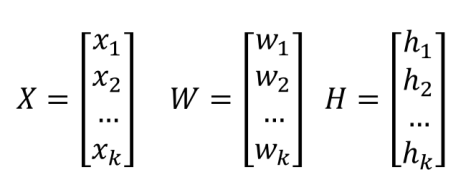

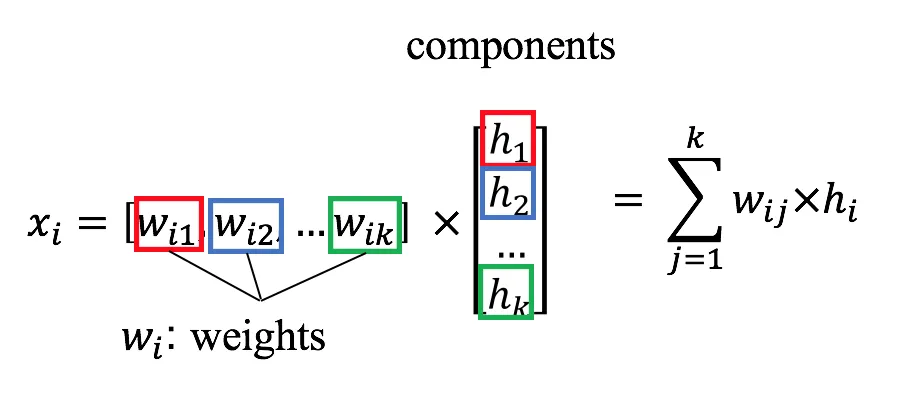

## When we use NMF?

Suited for tasks where the underlying factors can be interpreted as non-negative. So it works well if your data about counting stuff. Different from PCA, that includes positive and negative numbers.

What happens when we decompose this into two matrices? Imagine if the documents came from news articles. The word "eat" would be likely to appear in food-related articles, and therefore co-occur with words like "tasty" and "food". Therefore, these words would probably be grouped together into a "food" component vector, and each article would have a certain weight of the "food" topic.

Therefore, an NMF decomposition of the term-document matrix would yield components that could be considered "topics", and decompose each document into a weighted sum of topics. This is called topic modeling and is an important application of NMF.

## How do we conduct NMF?

Although there are some variants, a generally used measures of distance is the frobenius norm (the sum of element-wise squared errors). Formalizing this, we obtain the following objective:

image.png

Optimization methods:
1. Multiplicative Update <br>
In this method, W  and H   are each updated iteratively according to the following rule: <br>
image.png <br>
image.png

<br>
Rescaled gradient descent can be written as follows:

image.png

<br>

image.png

## Using NMF in Practice

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data

# Convert the text to tf-idf weighted term-document matrix
vectorizer = TfidfVectorizer(max_features=200, min_df=10, stop_words='english')
X = vectorizer.fit_transform(data)

In [8]:
idx_to_word = np.array(vectorizer.get_feature_names())

In [12]:
nmf = NMF(n_components=20, solver='mu')
W = nmf.fit_transform(X)
H = nmf.components_

In [20]:
print('W.shape', W.shape)
print('H.shape', H.shape)

W.shape (11314, 20)
H.shape (20, 200)


In [25]:
# Print the results
for i, topic in enumerate(H):
    print(f"Topic {i + 1}: {[str(word) for word in idx_to_word[topic.argsort()[-10:]]]}")

Topic 1: ['said', 'll', 'years', 'right', 'going', 'say', 'really', 'way', 've', 'time']
Topic 2: ['version', 'software', 'pc', 'using', 'program', 'files', 'dos', 'card', 'file', 'windows']
Topic 3: ['info', 'question', 'believe', 'doesn', 'say', 'card', 'help', 'mean', 'know', 'does']
Topic 4: ['things', 'world', 'true', 'say', 'man', 'life', 'people', 'believe', 'jesus', 'god']
Topic 5: ['available', 'com', '1993', 'ftp', 'article', 'send', 'mail', 'email', 'university', 'edu']
Topic 6: ['work', 'try', 'read', 'com', 'make', 'believe', 'think', 'people', 'want', 'don']
Topic 7: ['mean', 'want', 'people', 'little', 'got', 'maybe', 'work', 'thought', 'like', 'just']
Topic 8: ['world', 'person', 'like', 'public', 'state', 'right', 'law', 'armenian', 'government', 'people']
Topic 9: ['doing', 'really', 'doesn', 'make', 'sure', 'things', 'lot', 'look', 'don', 'like']
Topic 10: ['government', 'number', 'law', 'public', 'data', 'using', 'used', 'chip', 'key', 'use']
Topic 11: ['question', 